In [1]:
import os
import re
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup
from typing import Dict, List, Optional, Union, cast

# ------------- #
# Local Imports #
# ------------- #

## importing sys
import sys

## adding 00_helper_files to the system path as First Location to look
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')
## adding 03_projects Personal Work folder for current project to the system path as Second Location to look
sys.path.insert(1, '/Users/qmcbt/codeup-data-science/03_projects/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/justin_docs')
## adding 03_projects Root folder for current project to the system path as Third Location to look
sys.path.insert(2, '/Users/qmcbt/codeup-data-science/03_projects/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project')

## env containing sensitive access credentials
import env
from env import github_token, github_username
from env import user, password, host
from env import get_db_url

## Import Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import acquire as ac
import prepare as pr

# Seed 42
# Split 50/30/20

# Acquire

In [2]:
df = pr.get_clean_df()

In [3]:
df

,original,first_clean,clean,lemmatized,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,JavaScript
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,C#
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,Python
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text 23...,spacegray set custom ui theme sublime text 23 ...,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,JavaScript
...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,Python
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,C#
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,Python


In [4]:
df.language.unique()

['JavaScript', 'C#', 'Python', 'Java']
Categories (4, object): ['C#', 'Java', 'JavaScript', 'Python']

In [5]:
def word_groups(df, target):
    # split languages into seperate DataFrames
    js_lang = df[df[target] == 'JavaScript']
    cs_lang = df[df[target] == 'C#']
    jv_lang = df[df[target] == 'Java']
    py_lang = df[df[target] == 'Python']
    
    # create word groups on lemmatized column 
    js_lem = (' '.join(js_lang[js_lang[target] == 'JavaScript']['lemmatized']))
    cs_lem = (' '.join(cs_lang[cs_lang[target] == 'C#']['lemmatized']))
    jv_lem = (' '.join(jv_lang[jv_lang[target] == 'Java']['lemmatized']))
    py_lem = (' '.join(py_lang[py_lang[target] == 'Python']['lemmatized']))
    
    # create word groups on clean column
    js_clean = (' '.join(js_lang[js_lang[target] == 'JavaScript']['clean']))
    cs_clean = (' '.join(cs_lang[cs_lang[target] == 'C#']['clean']))
    jv_clean = (' '.join(jv_lang[jv_lang[target] == 'Java']['clean']))
    py_clean = (' '.join(py_lang[py_lang[target] == 'Python']['clean']))
    
    print('js_lang, cs_lang, jv_lang, py_lang, js_lem, cs_lem, jv_lem, py_lem, js_clean, cs_clean, jv_clean, py_clean')    
    return js_lang, cs_lang, jv_lang, py_lang, js_lem, cs_lem, jv_lem, py_lem, js_clean, cs_clean, jv_clean, py_clean

In [6]:
js_lang, cs_lang, jv_lang, py_lang, js_lem, cs_lem, jv_lem, py_lem, js_clean, cs_clean, jv_clean, py_clean = word_groups(df, 'language')

js_lang, cs_lang, jv_lang, py_lang, js_lem, cs_lem, jv_lem, py_lem, js_clean, cs_clean, jv_clean, py_clean


### Original code to build defined function
js_lang = df[df.language == 'JavaScript']
cs_lang = df[df.language == 'C#']
jv_lang = df[df.language == 'Java']
py_lang = df[df.language == 'Python']

### Original code to build defined function
js_lem = (' '.join(js_lang[js_lang.language == 'JavaScript']['lemmatized']))
cs_lem = (' '.join(cs_lang[cs_lang.language == 'C#']['lemmatized']))
jv_lem = (' '.join(jv_lang[jv_lang.language == 'Java']['lemmatized']))
py_lem = (' '.join(py_lang[py_lang.language == 'Python']['lemmatized']))

### Original code to build defined function
js_clean = (' '.join(js_lang[js_lang.language == 'JavaScript']['clean']))
cs_clean = (' '.join(cs_lang[cs_lang.language == 'C#']['clean']))
jv_clean = (' '.join(jv_lang[jv_lang.language == 'Java']['clean']))
py_clean = (' '.join(py_lang[py_lang.language == 'Python']['clean']))

In [7]:
js_lang 

,original,first_clean,clean,lemmatized,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,JavaScript
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text 23...,spacegray set custom ui theme sublime text 23 ...,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,JavaScript
7,SpaceInvaders\n=============\nThis is a remake...,SpaceInvaders ============= This is a remake o...,spaceinvaders remake invader phaser example fi...,spaceinvaders remake invader phaser example fi...,JavaScript
10,"<div align=""center"">\n <div>\n <img width=...",Isn't it weird how we can do ...,weird math head date math many days end year t...,weird math head date math many day end year ti...,JavaScript
...,...,...,...,...,...
415,# SS-refraction-through-depth-peeling-in-three...,# SS-refraction-through-depth-peeling-in-three...,ssrefractionthroughdepthpeelinginthreejs scree...,ssrefractionthroughdepthpeelinginthreejs scree...,JavaScript
419,# spacemacs.org\n\n[![Gitter](https://badges.g...,# spacemacs.org [![Gitter This is a **read-...,spacemacsorg gitter readonly repository develo...,spacemacsorg gitter readonly repository develo...,JavaScript
422,# `hyperterm-spacegray`\n\n![Spacegray Theme i...,# `hyperterm-spacegray` ![Spacegray Theme in ...,hypertermspacegray spacegray theme action lice...,hypertermspacegray spacegray theme action lice...,JavaScript
423,# LiveCoding.space\n\n> Collaborative Live Cod...,# LiveCoding.space > Collaborative Live Codin...,livecodingspace collaborative live coding supp...,livecodingspace collaborative live coding supp...,JavaScript


In [8]:
cs_lang 

,original,first_clean,clean,lemmatized,language
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,C#
6,# Spaceship Demo\n\n![](https://blogs.unity3d....,# Spaceship Demo ![ tab. These zip files con...,spaceship demo tab zip files contains full pro...,spaceship demo tab zip file contains full proj...,C#
9,"<p align=""center""> <img alt=""Space Station 14""...",Space Station 14 is a remake of SS13 that r...,station 14 remake ss13 runs robust toolbox sim...,station 14 remake ss13 run robust toolbox simi...,C#
17,\r\n# Contributing\r\n\r\nThis project welcome...,# Contributing\r \r This project welcomes cont...,contributing project welcomes contributions su...,contributing project welcome contribution sugg...,C#
35,# SpaceNavigator\nA Unity3D driver for the Spa...,# SpaceNavigator A Unity3D driver for the Spac...,spacenavigator unity3d driver spacenavigator 3...,spacenavigator unity3d driver spacenavigator 3...,C#
...,...,...,...,...,...
408,# &#9084; Resin.Search\n\n[![NuGet version (Re...,# ⍼ Resin.Search [![NuGet version (Resin.Sear...,resinsearch nuget version resinsearch indexing...,resinsearch nuget version resinsearch indexing...,C#
412,# ARSpaceShooter\nUnity Space Shooter game in ...,# ARSpaceShooter Unity Space Shooter game in A...,arspaceshooter unity shooter game augmented re...,arspaceshooter unity shooter game augmented re...,C#
418,# Dynamically Loading Animation\n Unity3D exam...,# Dynamically Loading Animation Unity3D examp...,dynamically loading animation unity3d example ...,dynamically loading animation unity3d example ...,C#
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,C#


In [9]:
jv_lang 

,original,first_clean,clean,lemmatized,language
5,"# Not actively maintained, but PRs are welcome...","# Not actively maintained, but PRs are welcome...",actively maintained prs welcomed synopsis cust...,actively maintained pr welcomed synopsis custo...,Java
12,Spacewalk\n=========\n\n![Current Spacewalk re...,Spacewalk ========= ![Current Spacewalk relea...,spacewalk current spacewalk releasecurrentrele...,spacewalk current spacewalk releasecurrentrele...,Java
16,# Space-Navigation-View\n[![Android Arsenal](h...,# Space-Navigation-View [![Android Arsenal ; ...,spacenavigationview android arsenal may use fi...,spacenavigationview android arsenal may use fi...,Java
18,# AdvancedRocketry\r\nAdvanced Rocketry is a m...,# AdvancedRocketry\r Advanced Rocketry is a mo...,advancedrocketry advanced rocketry mod explora...,advancedrocketry advanced rocketry mod explora...,Java
19,# AdvancedRocketry\r\nAdvanced Rocketry is a m...,# AdvancedRocketry\r Advanced Rocketry is a mo...,advancedrocketry advanced rocketry mod explora...,advancedrocketry advanced rocketry mod explora...,Java
24,"<h2 align=""center"">NOTICE</h2>\n\nThis project...",NOTICE This project is continued with updates...,notice project continued updates galacticraftl...,notice project continued update galacticraftle...,Java
46,The S-Space Package is a collection of algorit...,The S-Space Package is a collection of algorit...,sspace package collection algorithms building ...,sspace package collection algorithm building s...,Java
52,,,,,Java
54,## SpaceFX \n\n<br>\nA simple tiny space game ...,## SpaceFX A simple tiny space game written...,spacefx simple tiny game written javafx dev br...,spacefx simple tiny game written javafx dev br...,Java
62,# SpacesItemDecoration\n自定义RecyclerView.ItemDe...,# SpacesItemDecoration 自定义RecyclerView.ItemDec...,spacesitemdecoration recyclerviewitemdecoratio...,spacesitemdecoration recyclerviewitemdecoratio...,Java


In [10]:
py_lang 

,original,first_clean,clean,lemmatized,language
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,Python
8,## Space Shooter\n\nThe classic retro game rec...,## Space Shooter The classic retro game recre...,shooter classic retro game recreated using pyg...,shooter classic retro game recreated using pyg...,Python
14,# SPACE\n\nThis is an official PyTorch impleme...,# SPACE This is an official PyTorch implement...,official pytorch implementation model presente...,official pytorch implementation model presente...,Python
22,# PySpace\nGLSL Fractal Ray Marcher in Python\...,# PySpace GLSL Fractal Ray Marcher in Python ...,pyspace glsl fractal ray marcher python instal...,pyspace glsl fractal ray marcher python instal...,Python
25,# Space Invaders\n\n[![Language](https://img.s...,# Space Invaders [![Language ## Contact Th...,invaders language contact thanks checking game...,invader language contact thanks checking game ...,Python
...,...,...,...,...,...
421,# SkinDetection\nSkin detection using HSV &amp...,# SkinDetection Skin detection using HSV & YCb...,skindetection skin detection using hsv ycbcr c...,skindetection skin detection using hsv ycbcr c...,Python
424,## NEWLY ADDED A3G A NEW GPU/CPU ARCHITECTURE ...,## NEWLY ADDED A3G A NEW GPU/CPU ARCHITECTURE ...,newly added a3g new gpucpu architecture a3c su...,newly added a3g new gpucpu architecture a3c su...,Python
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,Python


In [11]:
js_lem

'spacex rest api open source rest api launch rocket core capsule starlink launchpad landing pad data affiliated associated authorized endorsed way officially connected exploration technology corp spacex subsidiary affiliate name spacex well related name mark emblem image registered trademark respective owner doc api client apps status database export usage cron job status sponsor studio 3t faq question correction please open issue get merged asap question concern shoot email spacegray set custom ui theme sublime text 23 hype minimal come different flavor accompanying base16 p c e cover read spaceinvaders remake invader phaser example find remake made requirejs break code module module assetsjavascriptmodule code organized thanks state statemanager class phaser find state assetsjavascriptstate used phaser 201no physic dev branch dev branch lot bug fix recommended use thanks requirejs made optimized version game viewed indexopthtml use compiled code found assetsjavascriptbuilt known issu

In [12]:
cs_lem

'archived version engineer version uptodate version game find issue game please report engineer welcome engineer source code repository build engineer play engineer need game steam asset audio model texture included repository downloading source code please read eula carefully end user license agreement 64bit version unable provide 64bit version 3rd party library licensing working trying negotiate better license allow u spaceship demo tab zip file contains full project onetime download without git station 14 remake ss13 run robust toolbox similar noncommercial license need removed wish use project commercially contributing project welcome contribution suggestion contribution require agree contributor license agreement cla declaring right actually grant u right use contribution detail visit submit pull request clabot automatically determine whether need provide cla decorate pr appropriately eg label comment simply follow instruction provided bot need across repos using cla project adopt

In [13]:
jv_lem

'actively maintained pr welcomed synopsis custom implementation relativelayout use along viewpager navigate fragment alt text may use file except compliance license may obtain copy license unless required applicable law agreed writing software distributed license distributed basis without warranty condition kind either express implied see license specific language governing permission limitation license spacewalk current spacewalk releasecurrentreleaseimg spacewalk 210 last release spacewalk project source code release found spacewalk210 branch redhatsatellite susemanager downloadit currentreleaseimg spacenavigationview android arsenal may use file except compliance license may obtain copy license unless required applicable law agreed writing software distributed license distributed basis without warranty condition kind either express implied see license specific language governing permission limitation license advancedrocketry advanced rocketry mod exploration resource advanced rocket

In [14]:
py_lem

'spaceship generator blender script procedurally generate 3d spaceship random seed spaceship screenshots 280 port mit license shooter classic retro game recreated using pygame python index demo official pytorch implementation model presented following paper unsupervised objectoriented scene representation via spatial attention decomposition facebook google drive download command created pyspace glsl fractal ray marcher python installation video overview example od demo invader language contact thanks checking game hope enjoy feel free contact lee robinson lrobinson2011gmailcom human tracker project using api find many people track spacecraft  trailing space sublime text current text selection etm code accompanies paper titled topic modeling embedding space adji b dieng francisco j r ruiz david blei arxiv link etm defines word topic embedding likelihood word etm categorical whose natural parameter given dot product word embedding assigned topic embedding etm document model learns interp

In [15]:
js_clean

'spacex rest api open source rest api launch rocket core capsule starlink launchpad landing pad data affiliated associated authorized endorsed way officially connected exploration technologies corp spacex subsidiaries affiliates names spacex well related names marks emblems images registered trademarks respective owners docs api clients apps status database exports usage cron job status sponsors studio 3t faq questions corrections please open issue get merged asap questions concerns shoot email spacegray set custom ui themes sublime text 23 hype minimal comes different flavors accompanying base16 p c e cover read spaceinvaders remake invader phaser example find remake made requirejs breaks code modules modules assetsjavascriptmodule code organized thanks state statemanager class phaser find states assetsjavascriptstate used phaser 201no physics dev branch dev branch lot bug fixes recommended use thanks requirejs made optimized version game viewed indexopthtml use compiled code found as

In [16]:
cs_clean 

'archived version engineers version uptodate version game find issue game please report engineers welcome engineers source code repository build engineers play engineers need game steam assets audio models textures included repository downloading source code please read eula carefully end user license agreement 64bit version unable provide 64bit version 3rd party libraries licensing working trying negotiate better license allow us spaceship demo tab zip files contains full project onetime download without git station 14 remake ss13 runs robust toolbox similar noncommercial licenses need removed wish use project commercially contributing project welcomes contributions suggestions contributions require agree contributor license agreement cla declaring right actually grant us rights use contribution details visit submit pull request clabot automatically determine whether need provide cla decorate pr appropriately eg label comment simply follow instructions provided bot need across repos u

In [17]:
jv_clean

'actively maintained prs welcomed synopsis custom implementation relativelayout use along viewpager navigate fragments alt text may use file except compliance license may obtain copy license unless required applicable law agreed writing software distributed license distributed basis without warranties conditions kind either express implied see license specific language governing permissions limitations license spacewalk current spacewalk releasecurrentreleaseimg spacewalk 210 last release spacewalk project source code release found spacewalk210 branch redhatsatellite susemanager downloadit currentreleaseimg spacenavigationview android arsenal may use file except compliance license may obtain copy license unless required applicable law agreed writing software distributed license distributed basis without warranties conditions kind either express implied see license specific language governing permissions limitations license advancedrocketry advanced rocketry mod exploration resources ad

In [18]:
py_clean

'spaceship generator blender script procedurally generate 3d spaceships random seed spaceship screenshots 280 port mit license shooter classic retro game recreated using pygame python index demo official pytorch implementation model presented following paper unsupervised objectoriented scene representation via spatial attention decomposition facebook google drive download commands created pyspace glsl fractal ray marcher python installation videos overview examples ods demo invaders language contact thanks checking game hope enjoy feel free contact lee robinson lrobinson2011gmailcom humans tracker project using api find many people track spacecraft  trailing spaces sublime text current text selection etm code accompanies paper titled topic modeling embedding spaces adji b dieng francisco j r ruiz david blei arxiv link etm defines words topics embedding likelihood word etm categorical whose natural parameter given dot product word embedding assigned topic embedding etm document model le

# RegEx

## Metacharacters

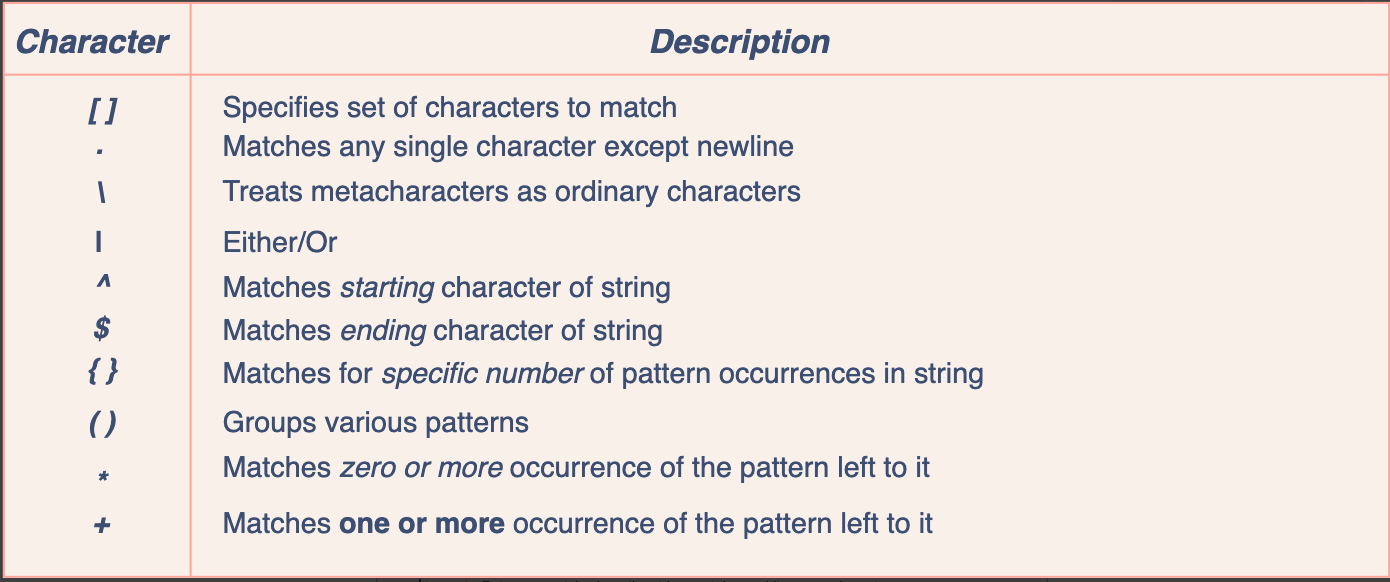

## Special Sequences

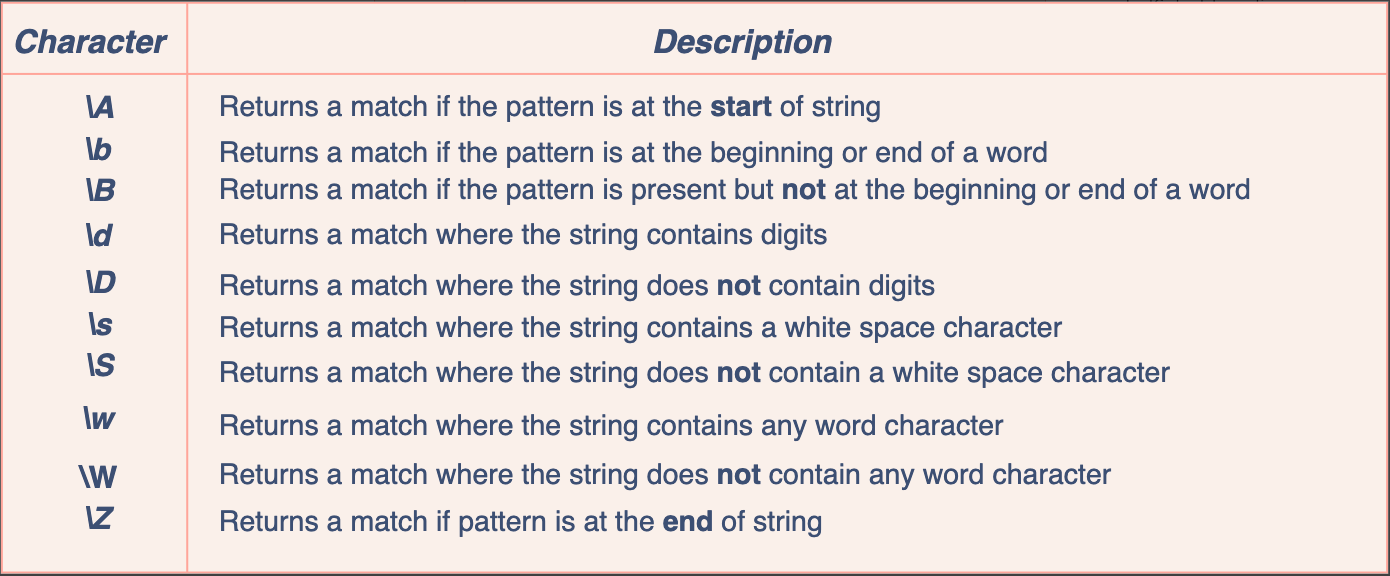

# RegEx functions
The re module provides users a variety of functions to search for a pattern in a particular string. Below are some of the most frequently used functions in detail:

### 1. re.findall()
The re.findall() function returns a list of strings containing all matches of the specified pattern.
The function takes as input the following:
* a character pattern
* the string from which to search  
```
string = "at what time?"
match = re.findall('at',string)
```
### 2. re.search()
The re.search() function returns a match object in case a match is found.  
The function takes as input the following:
* a character pattern
* the string from which to search  
```
string = "at what time?"
match = re.search('at',string)
```
### 3. re.split()
The re.split() function splits the string at every occurrence of the sub-string and returns a list of strings which have been split.  
The function takes as input the following:
* a character pattern
* the string from which to search  
```
string = "at what time?"
match = re.split('a',string)
```
### 4. re.sub()
The re.sub() function is used to replace occurrences of a particular sub-string with another sub-string.
This function takes as input the following:
* The sub-string to replace
* The sub-string to replace with
* The actual string
```
string = "at what time?"
match = re.sub("\s","!!!",string)
```

# Clean using RegEx

## Remove Links Replace with Displayed Text

# <center>```\[```    ```(.+)```    ```\]```</center>

|01 |02 |03 |04 |05 |06 |
|:-:|:-:|:-:|:-:|:-:|:-:|
|literal_Bracket|open_Group1|anything|1_or_more_times|close_Group1|literal_Bracket|
|\\ [           |(          |.       |+              |)           |\\]            |

# <center>```\(```    ```.```    ```+```    ```\)```</center>
|07 |08 |09 |10 |
|:-:|:-:|:-:|:-:|
|literal_Parenthesis|anything|1_or_more_times|literal_Parenthesis|
|\(                 |.       |+              |\)                 |


In [19]:
# Test text
text = """
        <html>Pull this data out</html><html><body><h1 align="center">
        <a href="https://spacevim.org/cn/">
        <img alt="SpaceVim" src="https://spacevim.org/logo.png" width="600"/>
        </a>
        </h1>
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [This is a link that needs to be Deleted!](https://www.This_is_a_link_that_needs_to_be_Deleted.com)
        [@kenney](http://opengameart.org/users/kenney)
        """

In [20]:
# 
stripped_links = re.sub(r"\[(.+)\]\(.+\)", r"\1", text)

In [21]:
stripped_links

'\n        <html>Pull this data out</html><html><body><h1 align="center">\n        <a href="https://spacevim.org/cn/">\n        <img alt="SpaceVim" src="https://spacevim.org/logo.png" width="600"/>\n        </a>\n        </h1>\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        This is a link that needs to be Deleted!\n        @kenney\n        '

In [22]:
stripped_line_break = stripped_links.replace("\n", '')
stripped_line_break

'        <html>Pull this data out</html><html><body><h1 align="center">        <a href="https://spacevim.org/cn/">        <img alt="SpaceVim" src="https://spacevim.org/logo.png" width="600"/>        </a>        </h1>        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        This is a link that needs to be Deleted!        @kenney        '

## Remove HTML tags

In [23]:
# Import Module
from bs4 import BeautifulSoup
import requests
 
# Website URL
URL = 'https://www.geeksforgeeks.org/data-structures/'
 
# Page content from Website URL
page = requests.get(URL)
 
# Function to remove tags
def remove_tags(html):
 
    # parse html content
    soup = BeautifulSoup(html, "html.parser")
 
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
 
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)
 
 
# Print the extracted data
#print(remove_tags(page.content))